In [7]:
import pandas as pd
import sqlite3
from sqlalchemy import create_engine

# Load the cleaned and validated dataset
file_path = 'C:/Users/khush/Documents/PGAGI/Dataset.csv'  # Updated path format for Windows
df = pd.read_csv(file_path)

# Create a connection to the SQLite database
engine = create_engine('sqlite:///billing_data.db')

# Insert data into the database
df.to_sql('billing_data', con=engine, if_exists='replace', index=False)

# Verify the data has been inserted
with engine.connect() as connection:
    result = connection.execute("SELECT * FROM billing_data LIMIT 5")
    for row in result:
        print(row)


(1001, 'David Wilson', '2023-01-01', 193.9875582, 'Pending', 'Consultation', 'Pediatrics')
(1002, 'Alice Johnson', '2023-01-02', 370.6560205, 'Pending', 'Purchase', 'Orthopedics')
(1003, 'Sophia Garcia', '2023-01-03', 233.0194861, 'Pending', 'Lab Test', 'Pharmacy')
(1004, 'Olivia Davis', '2023-01-04', 296.1207247, 'Paid', 'Follow-up', 'Pharmacy')
(1005, 'David Wilson', '2023-01-05', 294.6547636, 'Paid', 'Therapy', 'ENT')


In [8]:
# Data analysis(Billing Analysis)
with engine.connect() as connection:
    result = pd.read_sql("SELECT * FROM billing_data", con=connection)

# Perform analysis on the queried data
print(result.head())


   Account ID  Customer Name Billing Date      Amount   Status   Description  \
0        1001   David Wilson   2023-01-01  193.987558  Pending  Consultation   
1        1002  Alice Johnson   2023-01-02  370.656021  Pending      Purchase   
2        1003  Sophia Garcia   2023-01-03  233.019486  Pending      Lab Test   
3        1004   Olivia Davis   2023-01-04  296.120725     Paid     Follow-up   
4        1005   David Wilson   2023-01-05  294.654764     Paid       Therapy   

    Department  
0   Pediatrics  
1  Orthopedics  
2     Pharmacy  
3     Pharmacy  
4          ENT  


In [9]:
import pandas as pd
from sqlalchemy import create_engine

# Create a connection to the SQLite database
engine = create_engine('sqlite:///billing_data.db')


In [10]:
# Load the cleaned and validated dataset
file_path = 'C:/Users/khush/Documents/PGAGI/Dataset.csv'  # Updated path format for Windows
df = pd.read_csv(file_path)

# Insert data into the database
df.to_sql('billing_data', con=engine, if_exists='replace', index=False)

# Verify the data has been inserted
with engine.connect() as connection:
    result = connection.execute("SELECT * FROM billing_data LIMIT 5")
    for row in result:
        print(row)


(1001, 'David Wilson', '2023-01-01', 193.9875582, 'Pending', 'Consultation', 'Pediatrics')
(1002, 'Alice Johnson', '2023-01-02', 370.6560205, 'Pending', 'Purchase', 'Orthopedics')
(1003, 'Sophia Garcia', '2023-01-03', 233.0194861, 'Pending', 'Lab Test', 'Pharmacy')
(1004, 'Olivia Davis', '2023-01-04', 296.1207247, 'Paid', 'Follow-up', 'Pharmacy')
(1005, 'David Wilson', '2023-01-05', 294.6547636, 'Paid', 'Therapy', 'ENT')


In [11]:
# Query analysis
with engine.connect() as connection:
    result = pd.read_sql("SELECT * FROM billing_data", con=connection)

# Analysis on the queried data
print(result.head())


   Account ID  Customer Name Billing Date      Amount   Status   Description  \
0        1001   David Wilson   2023-01-01  193.987558  Pending  Consultation   
1        1002  Alice Johnson   2023-01-02  370.656021  Pending      Purchase   
2        1003  Sophia Garcia   2023-01-03  233.019486  Pending      Lab Test   
3        1004   Olivia Davis   2023-01-04  296.120725     Paid     Follow-up   
4        1005   David Wilson   2023-01-05  294.654764     Paid       Therapy   

    Department  
0   Pediatrics  
1  Orthopedics  
2     Pharmacy  
3     Pharmacy  
4          ENT  


Account ID                int64
Customer Name            object
Billing Date     datetime64[ns]
Amount                  float64
Status                   object
Description              object
Department               object
dtype: object
   Account ID  Customer Name Billing Date      Amount   Status   Description  \
0        1001   David Wilson   2023-01-01  193.987558  pending  Consultation   
1        1002  Alice Johnson   2023-01-02  370.656021  pending      Purchase   
2        1003  Sophia Garcia   2023-01-03  233.019486  pending      Lab Test   
3        1004   Olivia Davis   2023-01-04  296.120725     paid     Follow-up   
4        1005   David Wilson   2023-01-05  294.654764     paid       Therapy   

    Department  
0   pediatrics  
1  orthopedics  
2     pharmacy  
3     pharmacy  
4          ent  
Account ID         int64
Customer Name     object
Billing Date      object
Amount           float64
Status            object
Description       object
Department        object
dtyp

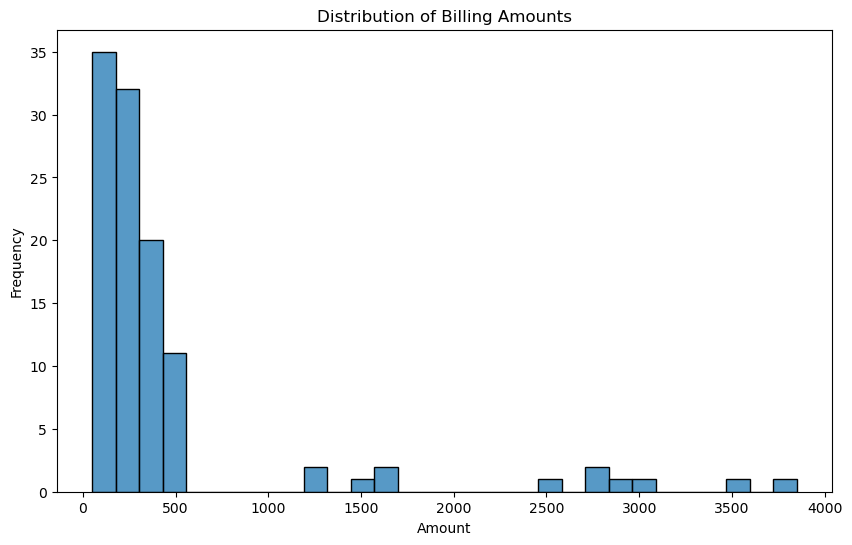

In [12]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/khush/Documents/PGAGI/Dataset.csv'  
df = pd.read_csv(file_path)

# Data Cleaning
df = df.dropna()

# Ensure 'Billing Date' is in datetime format
df['Billing Date'] = pd.to_datetime(df['Billing Date'], errors='coerce')

# Check for any remaining invalid dates and handle them
if df['Billing Date'].isnull().any():
    print("Invalid dates found, removing rows with invalid dates.")
    df = df[df['Billing Date'].notnull()]

# Debugging print to check the data types
print(df.dtypes)

df['Status'] = df['Status'].str.lower()
df['Department'] = df['Department'].str.lower()
df = df.drop_duplicates()

# Ensure 'Amount' is numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
assert (df['Amount'] > 0).all()

# Debugging print to check the data after cleaning
print(df.head())

# Connect to the SQLite database
engine = create_engine('sqlite:///billing_data.db')

# Insert cleaned data into the database
df.to_sql('billing_data', con=engine, if_exists='replace', index=False)

# Query data for analysis
with engine.connect() as connection:
    billing_data = pd.read_sql("SELECT * FROM billing_data", con=connection)

# Debugging print to check the data types in the queried data
print(billing_data.dtypes)

# Ensure 'Billing Date' in the queried data is in datetime format
billing_data['Billing Date'] = pd.to_datetime(billing_data['Billing Date'], errors='coerce')

# Billing Analysis
billing_data['Cycle Time'] = (billing_data['Billing Date'].max() - billing_data['Billing Date']).dt.days
billing_data['Payment Discrepancy'] = billing_data['Amount'].diff().abs()
average_payment = billing_data['Amount'].mean()
outliers = billing_data[billing_data['Amount'] > (average_payment + 3 * billing_data['Amount'].std())]

# Generate Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(billing_data['Amount'], bins=30)
plt.title('Distribution of Billing Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Save the report summary (Pseudo-code for LLM usage)
report_summary = f"""
Average Payment Amount: {average_payment}
Outliers: {outliers}
"""

with open('billing_report.txt', 'w') as file:
    file.write(report_summary)
